In [2]:
import uproot
from utilities.io_tools import input_tools,combinetf2_input,combinetf_input,output_tools
from utilities import boostHistHelpers as hh
from wremnants import histselections as sel
from wremnants import plot_tools
import hist
import numpy as np
import matplotlib.pyplot as plt
import pickle
import mplhep as hep

Welcome to JupyROOT 6.30/02


In [2]:
def hist_to_up_down_unc(h):
    hunc = h.copy()
    hunc.values(flow=True)[...] = np.sqrt(h.variances(flow=True))
    hup = hh.addHists(h, hunc)
    hdown = hh.addHists(h, hunc, scale2=-1)
    return hup, hdown

In [3]:
unfolding_inc_data = pickle.load(open("/scratch/submit/cms/kdlong/CombineStudies/Unfolding/ZMassDilepton_ptll_yll_Data//results_unfolded.pkl", "rb"))

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/submit/cms/kdlong/CombineStudies/Unfolding/ZMassDilepton_ptll_yll_Data//results_unfolded.pkl'

In [63]:
unfolding_inc_data["results"].keys()

dict_keys(['mu', 'pmaskedexp', 'pmaskedexpnorm'])

In [64]:
#unfolding_inc_data = pickle.load(open("/scratch/submit/cms/kdlong/CombineStudies/Unfolding/ZMassDilepton_ptll_yll_UnblindedData//results_unfolded.pkl", "rb"))
unfolding_inch = unfolding_inc_data["results"]["pmaskedexp"]["chan_13TeV"]["Z"]["hist_ptVGen"]
#unfolding_inc_datah = unfolding_inc_data["results"]["sumpois"]["chan_13TeV"]["Z"]["hist_ptVGen"]
#unfolding_inc_datah = unfolding_inc_data["results"]["pmaskedexp"]["chan_13TeV"]["Z"]["hist_ptVGen"]

In [5]:
ls /scratch/

CombineStudies/  cyue/      gpetrucc/  kdlong/    mdefranc/  singularity/
backup/          dwalter/   jaeyserm/  kelong/    mseidel/   tyjyang/
bendavid/        fvazzole/  jkiesele/  mciprian/  shared/    yofeng/


In [57]:
unfolding_inc_data["results"]["xsec_normalized"]["chan_13TeV"]["Z"]["hist_ptVGen"]

Hist(Variable([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 20, 23, 27, 32, 40, 54, 100], underflow=False, overflow=False, name='ptVGen'), storage=Weight()) # Sum: WeightedSum(value=1, variance=0.000377605)

In [4]:
edges = [0, *unfolding_inc_datah.axes[0].edges[2:]]

In [5]:
unfolding_inc_datah = hh.rebinHist(unfolding_inc_datah, "ptVGen", edges)

In [6]:
res_n3p0ll_wlikefit = combinetf2_input.get_fitresult("/scratch/submit/cms/kdlong/CombineStudies/Unblinded/ZGen_ptVgen/ZGen_postfitFromUnblindedWlike.hdf5")
res_n3p0ll_ptlldatafit = combinetf2_input.get_fitresult("/scratch/submit/cms/kdlong/CombineStudies/Unblinded/ZGen_ptVgen/ZGen_postfitFromRecoPtll.hdf5")

In [7]:
gen_inc = input_tools.read_and_scale("/scratch/submit/cms/wmass/histmaker_output_Aug1_mZ_w_like_unblinding_ext/w_z_gen_dists_scetlib_dyturboCorr_maxFiles_m1_helicity.hdf5", "ZmumuPostVFP", "nominal_gen").project("ptVgen")[:100j]

In [8]:
#n3p0ll_wlikefith = hh.rebinHist(res_n3p0ll_wlikefit["hist_postfit_inclusive"]["ch0"].get(), "ptVgen", unfolding_inc_datah.axes["ptVGen"].edges)/1000.
#n3p0ll_ptlldatafith = hh.rebinHist(res_n3p0ll_ptlldatafit["hist_postfit_inclusive"]["ch0"].get(), "ptVgen", unfolding_inc_datah.axes["ptVGen"].edges)/1000.

In [9]:
n3p0ll_wlikefith = res_n3p0ll_wlikefit["hist_postfit_inclusive"]["ch0"].get()[:100j]/1000.
n3p0ll_ptlldatafith = res_n3p0ll_ptlldatafit["hist_postfit_inclusive"]["ch0"].get()[:100j]/1000.

In [10]:
ptllup, ptlldown = hist_to_up_down_unc(n3p0ll_ptlldatafith)
wlikeup, wlikedown = hist_to_up_down_unc(n3p0ll_wlikefith)

In [11]:
unfolding_inc_datah.axes[0].edges

array([  0.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        13.,  15.,  17.,  20.,  23.,  27.,  32.,  40.,  54., 100.])

In [18]:
#out = "/eos/user/k/kelong/www/WMassAnalysis/2024Aug_Unblinded/"
out = "/eos/user/c/cmsmwbot/www/WMassAnalysis/PlotsForPaper/NaturePreCWR/"

Wrote file(s) /tmp/tmpvn1x5zfx/www/WMassAnalysis/PlotsForPaper/V2/Z//ptVgen_postfit_Wlike_RecoPtll_PtllRatio.pdf(.png)


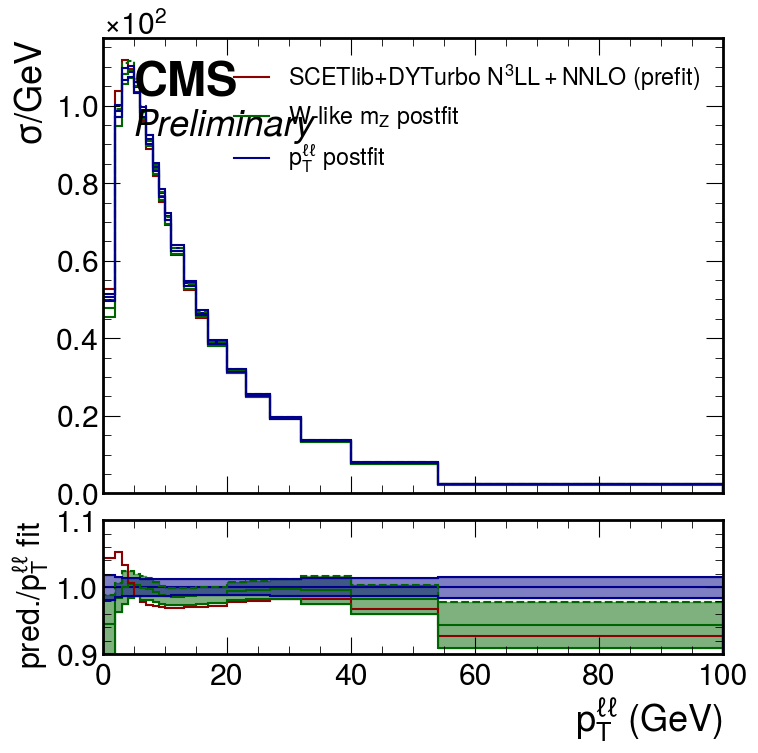

In [13]:
fig = plot_tools.makePlotWithRatioToRef(
                hists=[
                    n3p0ll_ptlldatafith,
                    n3p0ll_wlikefith,
                    gen_inc,
                    wlikeup,
                    wlikedown,
                    ptllup,
                    ptlldown,
                ],
                labels=[
                        r"$p_{T}^{\ell\ell}$ postfit",
                        r"W-like $m_{Z}$ postfit",
                        r"SCETlib+DYTurbo N$^{3}LL+NNLO$ (prefit)",
                        "", "", 
                        "", "",
                       ],
                colors=[
                        "darkblue",
                        "darkgreen",
                        "darkred",
                        "darkgreen",
                        "darkgreen",
                        "darkblue",
                        "darkblue",
                       ],
                linestyles=["solid"]*3+["dashed"]+["solid"]*2,
                xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
                ylabel="$\sigma$/GeV",
                rlabel=r"pred./p$_{T}^{\ell\ell}$ fit",
                rrange=[0.9, 1.1],
                nlegcols=1,
                legtext_size=24,
                #yscale=1.2,
                xlim=None, binwnorm=1.0, baseline=True,
                yerr=False,
                fill_between=4,
                cms_label="Preliminary",
)

outdir = output_tools.make_plot_dir(out, "Z", eoscp=True)
name = "ptVgen_postfit_Wlike_RecoPtll_PtllRatio"
plot_tools.save_pdf_and_png(outdir, name)
plot_tools.write_index_and_log(outdir, name)
output_tools.copy_to_eos(outdir, out, "Z", deleteFullTmp=True)

Wrote file(s) /tmp/tmpmxgthw6c/www/WMassAnalysis/PlotsForPaper/NaturePreCWR/Z//ptVgen_postfit_Wlike_RecoPtll_PrefitRatio.pdf(.png)


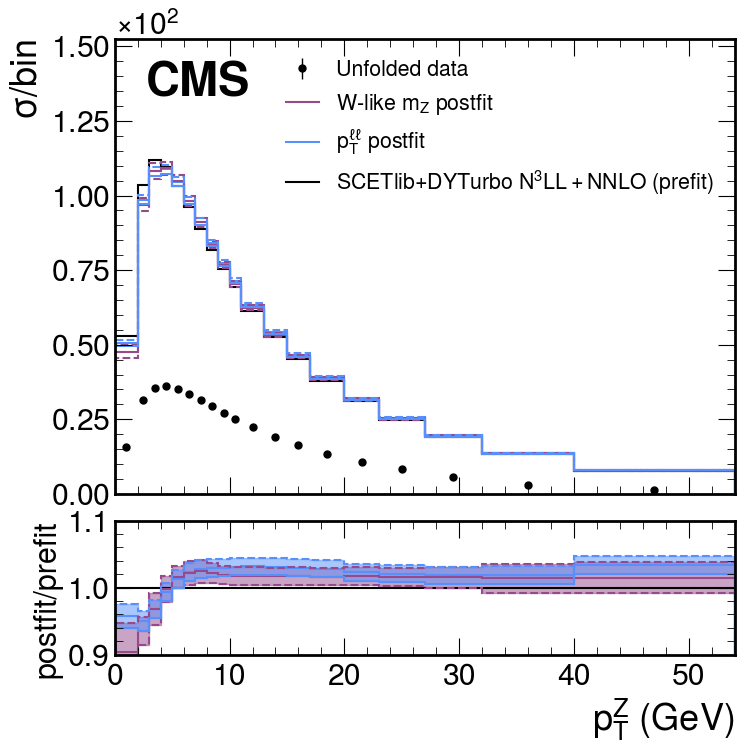

In [65]:
fig = plot_tools.makePlotWithRatioToRef(
                hists=[x[:54j] for x in [
                    gen_inc,
                    n3p0ll_ptlldatafith,
                    n3p0ll_wlikefith,
                    unfolding_inch,
                    wlikeup,
                    wlikedown,
                    ptllup,
                    ptlldown,
                ]],
                labels=[
                        r"SCETlib+DYTurbo N$^{3}LL+NNLO$ (prefit)",
                        r"$p_{T}^{\ell\ell}$ postfit",
                        r"W-like $m_{Z}$ postfit",
                        "Unfolded data",
                        "", "", 
                        "", "",
                       ],
                colors=[
                        "black",
                        "#5790FC",
                        "#964A8B",
                        "black",
                        "#964A8B",
                        "#964A8B",
                        "#5790FC",
                        "#5790FC",
                       ],
                linestyles=["solid",]*3+["dashed"]*4,
                xlabel="p$_{T}^{Z}$ (GeV)", 
                ylabel="$\sigma$/bin",
                rlabel=r"postfit/prefit",
                rrange=[0.9, 1.1],
                nlegcols=1,
                legtext_size=22,
                yscale=1.3,
                xlim=None, binwnorm=1.0, baseline=True,
                yerr=False,
                fill_between=4,
                cms_label=" ",
                dataIdx=3,
)
outdir = output_tools.make_plot_dir(out, "Z", eoscp=True)
name = "ptVgen_postfit_Wlike_RecoPtll_PrefitRatio"
plot_tools.save_pdf_and_png(outdir, name)
plot_tools.write_index_and_log(outdir, name)
output_tools.copy_to_eos(outdir, out, "Z", deleteFullTmp=True)

In [24]:
gen_inc_w = input_tools.read_all_and_scale("/scratch/submit/cms/wmass/histmaker_output_Aug19_fe51c5b/w_z_gen_dists_scetlib_dyturboCorr_maxFiles_m1_helicity_theorynom.hdf5", ["WminusmunuPostVFP", "WplusmunuPostVFP"], ["nominal_gen"])[0].project("ptVgen")[:100j]


In [25]:
mwfit = combinetf2_input.get_fitresult("/scratch/submit/cms/kdlong/CombineStudies/Unblinded/WGen_ptVgen/WGen_postfitFromUnblindedReco.hdf5")
ptllcombfit = combinetf2_input.get_fitresult("/scratch/submit/cms/kdlong/CombineStudies/Unblinded/WGen_ptVgen/WGen_postfitFromUnblindedPtllComb.hdf5")

In [ ]:
mwfit["hist_postfit_inclusive"]

In [26]:
mwfith = mwfit["hist_postfit_inclusive"]["ch0"].get()[:100j]/1000.
ptllcombfith = ptllcombfit["hist_postfit_inclusive"]["ch0"].get()[:100j]/1000.

In [27]:
ptllcombup, ptllcombdown = hist_to_up_down_unc(ptllcombfith)
mwup, mwdown = hist_to_up_down_unc(mwfith)

In [ ]:
mwfith

Wrote file(s) /tmp/tmp2m88hsu4/www/WMassAnalysis/PlotsForPaper/NaturePreCWR/W//ptVgen_postfit_RecoPtll_PrefitRatio.pdf(.png)


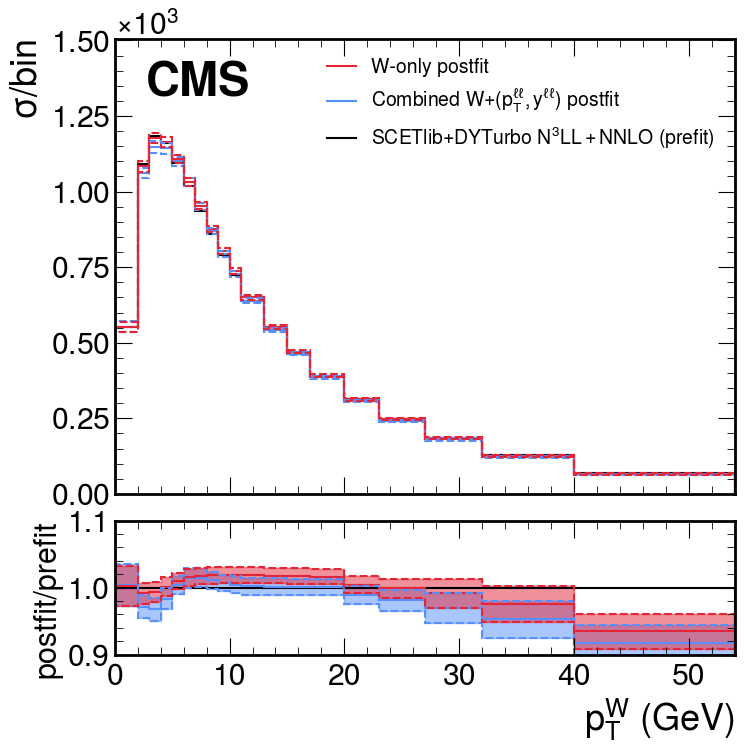

In [39]:
fig = plot_tools.makePlotWithRatioToRef(
                hists=[x[:54j] for x in [
                    gen_inc_w,
                    mwfith,
                    ptllcombfith,
                    mwup,
                    mwdown,
                    ptllcombup,
                    ptllcombdown,
                ]],
                labels=[
                        r"SCETlib+DYTurbo N$^{3}LL+NNLO$ (prefit)",
                        r"Combined W$+(p_{T}^{\ell\ell}, y^{\ell\ell})$ postfit",
                        r"W-only postfit",
                        "", "", 
                        "", "",
                       ],
                colors=[
                        "black",
                        "#5790FC",
                        "#E42536",
                        "#5790FC",
                        "#5790FC",
                        "#E42536",
                        "#E42536",
                       ],
                linestyles=["solid"]*3+["dashed"]*4,
                xlabel="p$_{T}^{W}$ (GeV)", 
                ylabel="$\sigma$/bin",
                rlabel=r"postfit/prefit",
                rrange=[0.9, 1.1],
                nlegcols=1,
                xlim=None, binwnorm=1.0, baseline=True,
                yerr=False,
                fill_between=4,
                cms_label=' ',
                yscale=1.2,
)
outdir = output_tools.make_plot_dir(out, "W", eoscp=True)
name = "ptVgen_postfit_RecoPtll_PrefitRatio"
plot_tools.save_pdf_and_png(outdir, name)
plot_tools.write_index_and_log(outdir, name)
output_tools.copy_to_eos(outdir, out, "W", deleteFullTmp=True)

In [38]:
fig = plot_tools.makePlotWithRatioToRef(
                hists=[
                    mwfith,
                    ptllcombfith,
                    gen_inc_w,
                    mwup,
                    mwdown,
                    ptllcombup,
                    ptllcombdown,
                ],
                labels=[
                        r"$p_{T}^{W}$ postfit",
                        r"$p_{T}^{W}$ postfit, $p_{T}^{\ell\ell}$ simult.",
                        r"Prefit N$^{3}LL+NNLO$",
                        "", "", 
                        "", "",
                       ],
                colors=[
                        "darkblue",
                        "darkgreen",
                        "darkred",
                        "darkblue",
                        "darkblue",
                        "darkgreen",
                        "darkgreen",
                       ],
                linestyles=["solid"]*2+["dashed"]+["solid"]*4,
                xlabel="p$_{T}^{W}$ (GeV)", 
                ylabel="$\sigma$/bin",
                rlabel=r"x/Nom. fit.",
                rrange=[0.9, 1.1],
                nlegcols=1,
                xlim=None, binwnorm=1.0, baseline=True,
                yerr=False,
                fill_between=4,
                yscale=1.2,
                cms_decorr=' ',
)
outdir = output_tools.make_plot_dir(out, "W", eoscp=True)
name = "ptVgen_postfit_RecoPtll_NominalRatio"
plot_tools.save_pdf_and_png(outdir, name)
plot_tools.write_index_and_log(outdir, name)
output_tools.copy_to_eos(outdir, out, "W", deleteFullTmp=True)

TypeError: makePlotWithRatioToRef() got an unexpected keyword argument 'cms_decorr'

In [ ]:
hh.divideHists(gen_inc, gen_inc_w)[:40j].plot()

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
                hists=[
                    hh.divideHists(gen_inc_w, gen_inc)[:40j],
                    hh.divideHists(mwfith, n3p0ll_ptlldatafith)[:40j],
                    hh.divideHists(ptllcombfith, n3p0ll_ptlldatafith)[:40j],
                ],
                labels=[
                        "Prefit",
                        "Nominal postfit",
                        "Combined postfit",
                       ],
                colors=[
                        "darkred",
                        "darkgreen",
                        "darkblue",
                       ],
                linestyles=["solid"]*2,
                xlabel="p$_{T}^{V}$ (GeV)", 
                ylabel="W/Z ratio",
                rlabel=r"x/prefit",
                rrange=[0.8, 1.2],
                nlegcols=1,
                ylim=[5, 15],
                xlim=None, baseline=True,
                yerr=False,
                fill_between=4,
)
outdir = output_tools.make_plot_dir(out, "W", eoscp=True)
name = "ptVgen_postfit_WZRatio"
plot_tools.save_pdf_and_png(outdir, name)
plot_tools.write_index_and_log(outdir, name)
output_tools.copy_to_eos(outdir, out, "W", deleteFullTmp=True)

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
                hists=[
                    hh.divideHists(mwfith, gen_inc_w),
                    hh.divideHists(n3p0ll_wlikefith, gen_inc),
                ],
                labels=[
                        "W",
                        "W-like Z",
                       ],
                colors=[
                        "darkgreen",
                        "darkblue",
                       ],
                linestyles=["solid"]*2,
                xlabel="p$_{T}^{V}$ (GeV)", 
                ylabel="postfit/prefit ratio",
                rlabel=r"W-like/W",
                rrange=[0.8, 1.2],
                nlegcols=1,
                ylim=[0.8, 1.2],
                xlim=None, baseline=True,
                yerr=False,
                fill_between=4,
)
outdir = output_tools.make_plot_dir(out, "W", eoscp=True)
name = "ptVgen_postfit_WZCompare"
plot_tools.save_pdf_and_png(outdir, name)
plot_tools.write_index_and_log(outdir, name)
output_tools.copy_to_eos(outdir, out, "W", deleteFullTmp=True)